# Kmeans

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


# Load the dataset into a Pandas DataFrame
csv_data = pd.read_csv('/kaggle/input/globalmissingmigrant/Global Missing Migrants Dataset.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select specific columns of interest, including 'Cause of Death'
selected_columns = [
    'Cause of Death', 'Number of Dead', 'Minimum Estimated Number of Missing', 'Total Number of Dead and Missing',
    'Number of Males', 'Number of Females', 'Number of Children', 'Migration route', 'Incident Type',
    'Region of Origin',
    'Number of Survivors'
]

# Create a new DataFrame with only the selected columns
data = csv_data[selected_columns]

# Encode the 'Migration route', 'Incident Type', 'Region of Origin', and 'Cause of Death' columns
label_encoder = LabelEncoder()
data['Migration route'] = label_encoder.fit_transform(data['Migration route'])
data['Incident Type'] = label_encoder.fit_transform(data['Incident Type'])
data['Region of Origin'] = label_encoder.fit_transform(data['Region of Origin'])
data['Cause of Death'] = label_encoder.fit_transform(data['Cause of Death'])
data.fillna(0, inplace=True)

# Define the features for K-Means clustering
X = data.drop(columns=['Cause of Death'])

# Perform K-Means clustering
kmeans_model = KMeans(n_clusters=15, random_state=42)  # You can adjust the number of clusters as needed
data['Cluster'] = kmeans_model.fit_predict(X)

# Calculate the silhouette score to evaluate the clustering quality
silhouette_avg = silhouette_score(X, data['Cluster'])
print("Silhouette Score:", silhouette_avg)

# You can explore the cluster assignments in the 'Cluster' column of the DataFrame
# and analyze the clusters further as needed.

Silhouette Score: 0.5159508410157282


## view the cluster centers

In [2]:
cluster_centers = kmeans_model.cluster_centers_
cluster_centers

array([[1.96306328e+00, 2.36394977e-01, 2.19945826e+00, 9.11844373e-01,
        5.35336124e-01, 2.29992613e-01, 2.11245999e+01, 1.01428220e+00,
        2.47576951e+01, 7.79364689e-01],
       [9.80000000e+00, 8.06666667e+00, 1.78666667e+01, 3.93333333e+00,
        4.66666667e-01, 2.66666667e-01, 8.20000000e+00, 1.20000000e+00,
        2.14666667e+01, 5.65200000e+02],
       [5.22285714e+00, 6.34857143e+00, 1.15714286e+01, 3.14285714e+00,
        1.02857143e+00, 6.40000000e-01, 8.65714286e+00, 1.28571429e+00,
        2.24342857e+01, 1.14800000e+02],
       [5.00000000e+00, 1.19604167e+02, 1.24604167e+02, 1.43333333e+01,
        4.10416667e+00, 1.14583333e+00, 5.68750000e+00, 1.29166667e+00,
        2.06666667e+01, 2.00416667e+01],
       [1.53002925e+00, 3.65341594e-01, 1.89537085e+00, 8.08982963e-01,
        2.18378936e-01, 7.93323008e-02, 1.93572535e+01, 1.01376699e+00,
        6.67888487e+00, 7.05214249e-01],
       [3.75000000e+01, 5.05000000e+02, 5.42500000e+02, 6.00000000e+00,
   

## plot the graph

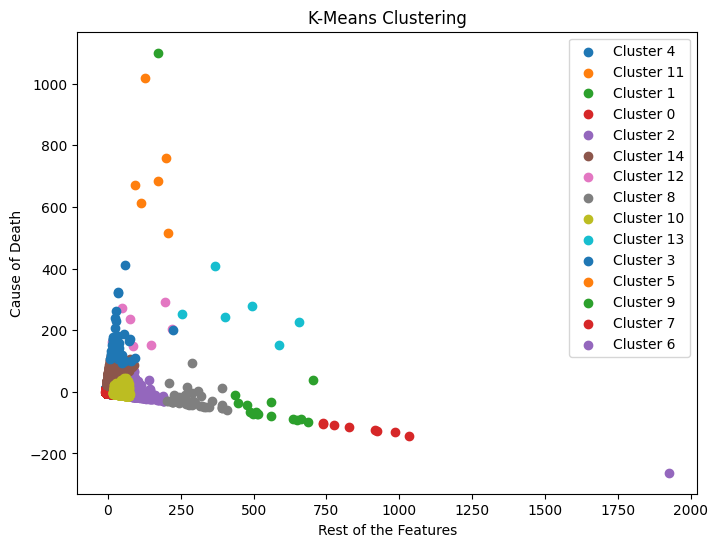

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce data dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Add the cluster labels to the DataFrame
data['Cluster'] = kmeans_model.labels_

# Create a scatter plot of the clusters
plt.figure(figsize=(8, 6))
for cluster in data['Cluster'].unique():
    plt.scatter(X_2d[data['Cluster'] == cluster][:, 0], X_2d[data['Cluster'] == cluster][:, 1], label=f'Cluster {cluster}')

plt.title("K-Means Clustering")
plt.xlabel("Rest of the Features")
plt.ylabel("Cause of Death")
plt.legend()
plt.show()


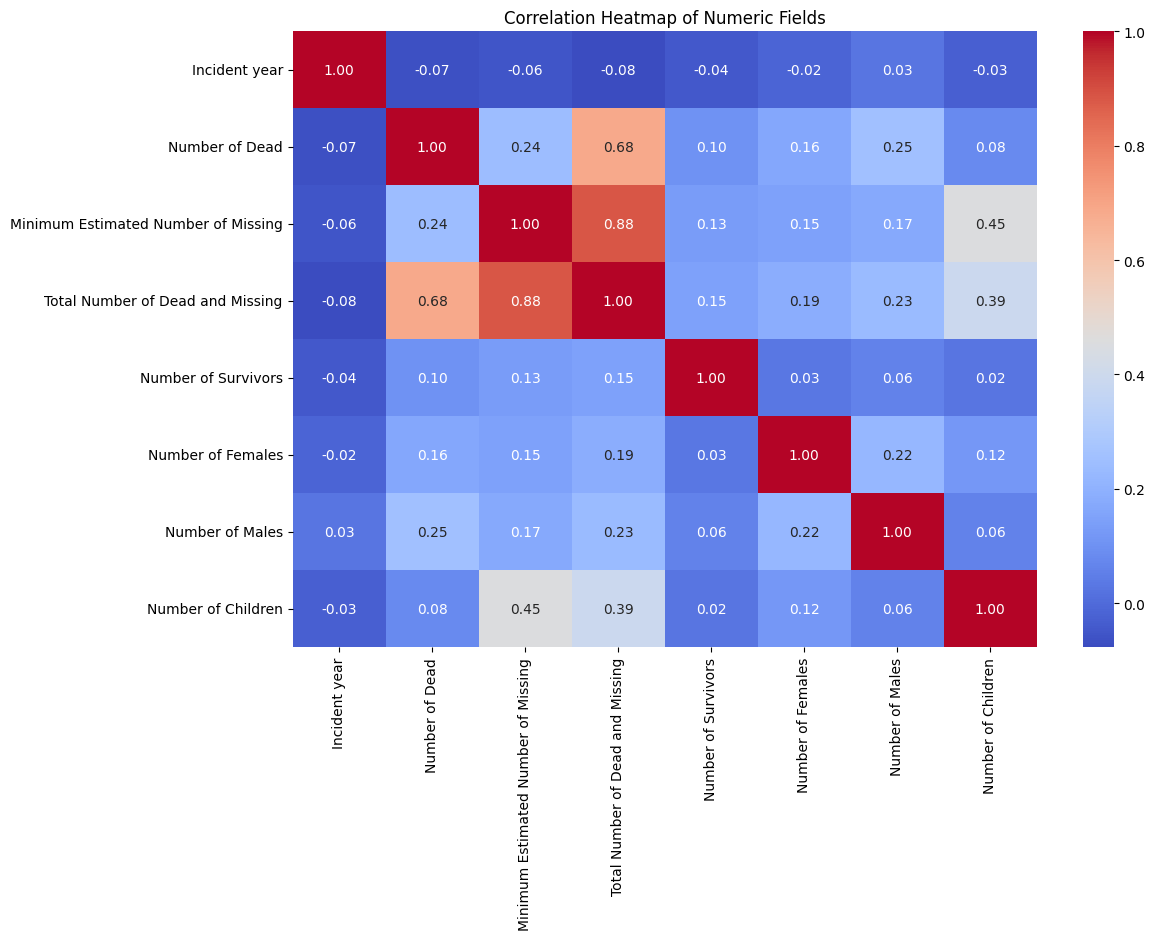

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your dataset file path)
df = pd.read_csv('/kaggle/input/globalmissingmigrant/Global Missing Migrants Dataset.csv')

# Select only the numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Fields')
plt.show()


## view the cluster modes

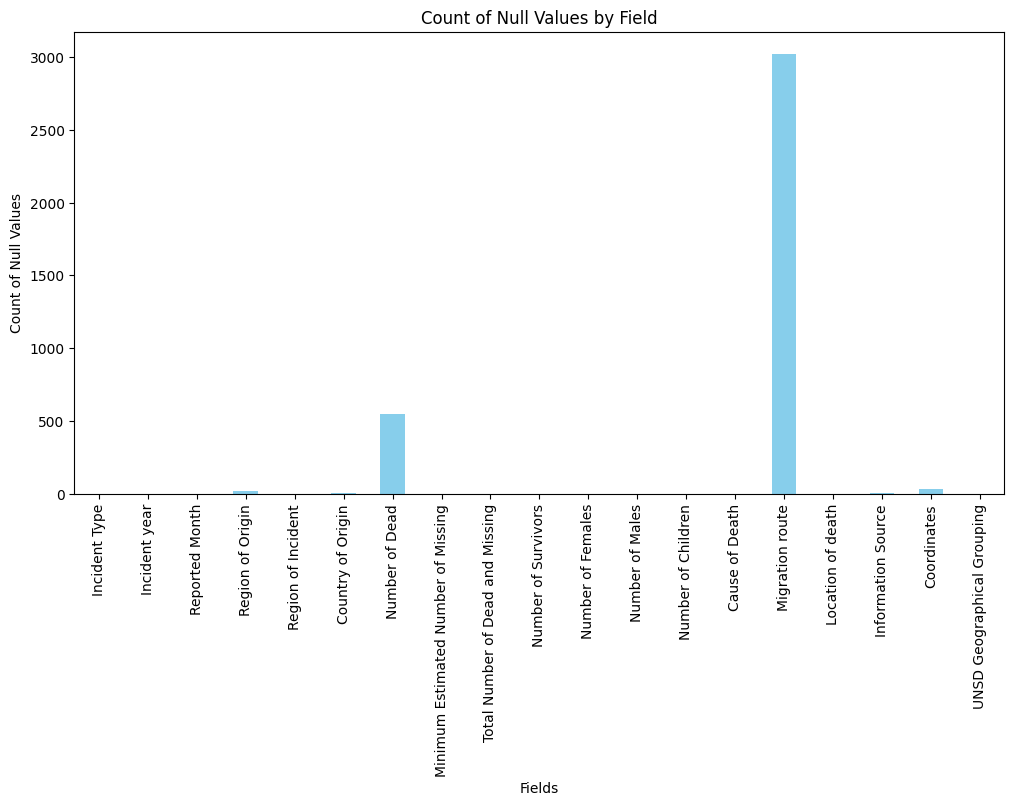

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read your dataset into a Pandas DataFrame (assuming it's in a CSV format)
# Replace 'your_dataset.csv' with the actual file path to your dataset.
df = pd.read_csv('/kaggle/input/globalmissingmigrant/Global Missing Migrants Dataset.csv')

# Calculate the count of null values for each field
null_counts = df.isnull().sum()

# Create a bar chart to visualize the count of null values
plt.figure(figsize=(12, 6))
null_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Null Values by Field')
plt.xlabel('Fields')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


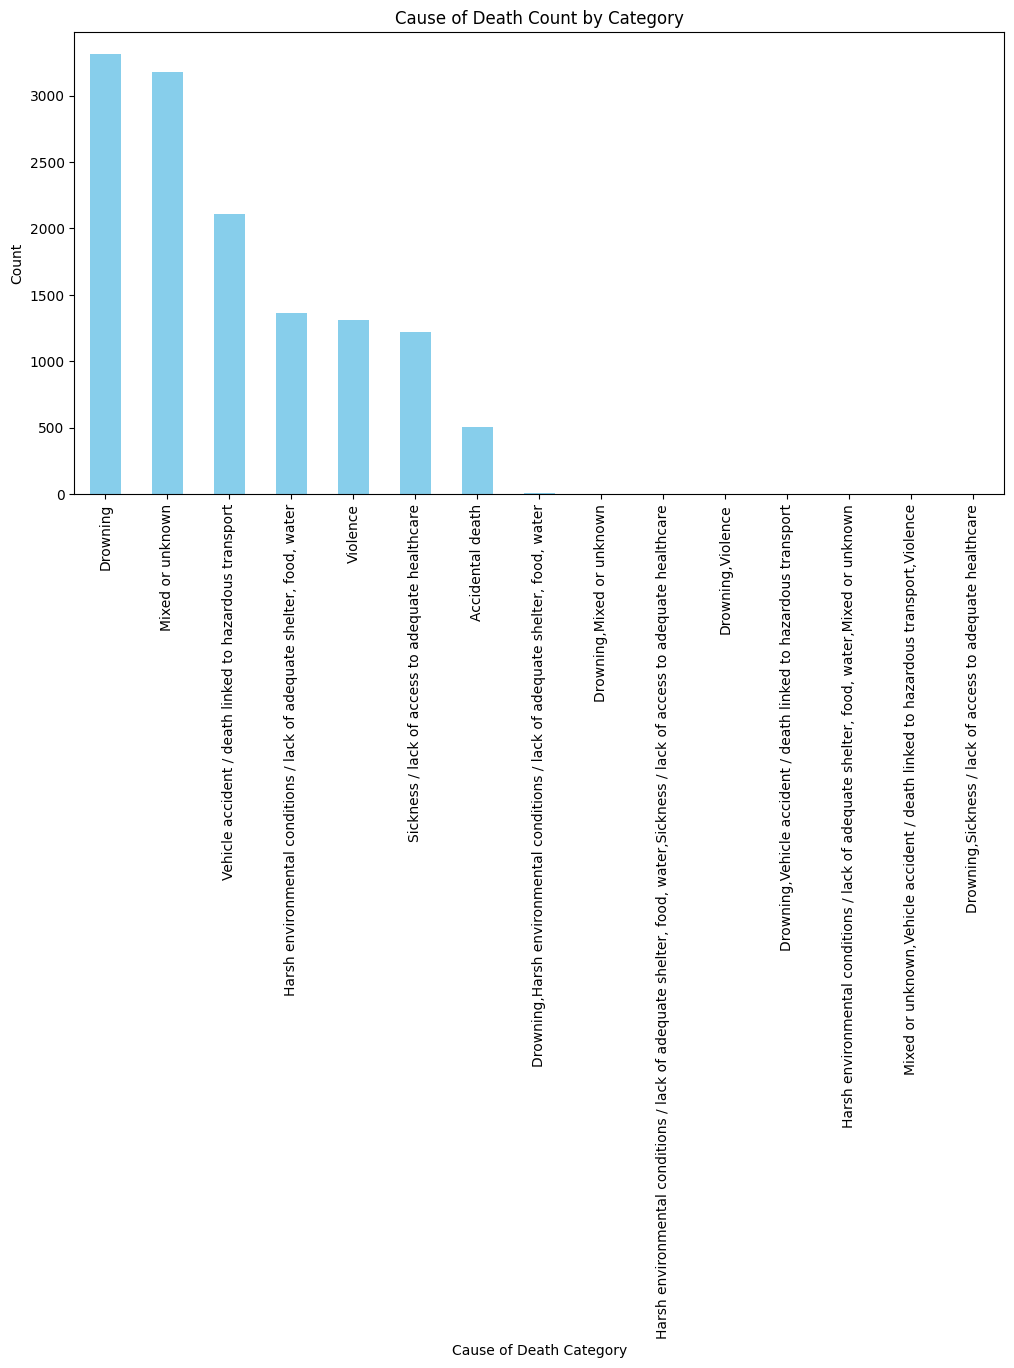

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read your dataset into a Pandas DataFrame
# Replace 'your_dataset.csv' with the actual file path to your dataset.
df = pd.read_csv('/kaggle/input/globalmissingmigrant/Global Missing Migrants Dataset.csv')

# Count the occurrences of each category in the 'Cause of Death' column
cause_of_death_counts = df['Cause of Death'].value_counts()

# Create a bar chart to visualize the counts
plt.figure(figsize=(12, 6))
cause_of_death_counts.plot(kind='bar', color='skyblue')
plt.title('Cause of Death Count by Category')
plt.xlabel('Cause of Death Category')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


In [7]:
cluster_modes = data.groupby('Cluster')['Cause of Death'].apply(lambda x: x.mode().iloc[0])
print(cluster_modes)

Cluster
0     10
1     10
2      1
3      1
4     10
5      1
6     10
7     10
8      1
9      1
10     1
11     1
12     1
13     1
14     1
Name: Cause of Death, dtype: int64


# Decision Tree 
## with oversampling and undersampling

predict: 'Cause of Death'
input: 'Number of Dead', 'Minimum Estimated Number of Missing', 'Total Number of Dead and Missing', 'Number of Males', 'Number of Females', 'Number of Children', 'Migration route', 'Incident Type', 'Region of Origin','Number of Survivors'

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset into a Pandas DataFrame
csv_data = pd.read_csv('/kaggle/input/globalmissingmigrant/Global Missing Migrants Dataset.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select specific columns of interest, including 'Cause of Death'
selected_columns = [
    'Cause of Death', 'Number of Dead', 'Minimum Estimated Number of Missing', 'Total Number of Dead and Missing',
    'Number of Males', 'Number of Females', 'Number of Children', 'Migration route', 'Incident Type',
    'Region of Origin',
    'Number of Survivors'
]

# Create a new DataFrame with only the selected columns
data = csv_data[selected_columns]

# Encode the 'Migration route', 'Incident Type', 'Region of Origin', and 'Cause of Death' columns
label_encoder = LabelEncoder()
data['Migration route'] = label_encoder.fit_transform(data['Migration route'])
data['Incident Type'] = label_encoder.fit_transform(data['Incident Type'])
data['Region of Origin'] = label_encoder.fit_transform(data['Region of Origin'])
data['Cause of Death'] = label_encoder.fit_transform(data['Cause of Death'])
data.fillna(0, inplace=True)

# One-hot encode categorical features

X = data.drop(columns=['Cause of Death'])
y = data['Cause of Death']

# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomOverSampler for oversampling the minority class
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Resample the dataset to oversample the minority class
X_resampled_over, y_resampled_over = oversampler.fit_resample(X, y)

# Initialize the RandomUnderSampler for undersampling the majority class
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)

# Resample the oversampled dataset to undersample the majority class
X_resampled_combined, y_resampled_combined = undersampler.fit_resample(X_resampled_over, y_resampled_over)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_combined, y_resampled_combined, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Compute the cost-complexity pruning path
path = decision_tree_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot the pruning path
# fig, ax = plt.subplots()
# ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
# ax.set_xlabel("effective alpha")
# ax.set_ylabel("total impurity of leaves")
# ax.set_title("Total Impurity vs Effective Alpha for training set")

# Find the optimal value for ccp_alpha
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]

# Set the ccp_alpha parameter
decision_tree_model = DecisionTreeClassifier(ccp_alpha=optimal_ccp_alpha, random_state=42)
# decision_tree_model.set_ccp_alpha(optimal_ccp_alpha)

decision_tree_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = decision_tree_model.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Results: ")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Results: 
Accuracy: 0.6255760368663594
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       113
           1       0.00      0.00      0.00         0
           2       1.00      0.50      0.67         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00       674
           5       0.00      0.00      0.00         1
           7       0.39      0.41      0.40       261
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       0.61      0.71      0.66       607
          12       0.35      0.34      0.35       244
          13       0.46      0.55      0.50       428
          14       0.53      0.34      0.41       272

    accuracy                           0.63      2604
   macro avg       0.33      0.30      0.31      2604
weighted avg       0.60      0.63      0.61      2604



## view the decision tree

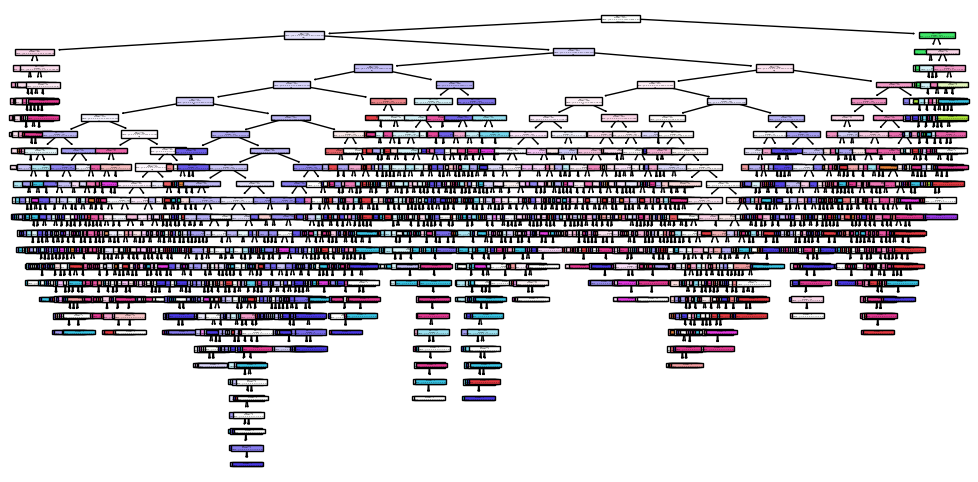

In [9]:
plt.figure(figsize=(12, 6))
plot_tree(decision_tree_model, filled=True, feature_names=selected_columns)
plt.show()

## view the feature importance

In [10]:
# Calculate feature importance
feature_importance = decision_tree_model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print("Feature Importance:\n", feature_importance_df)


Feature Importance:
                                Feature  Importance
7                        Incident Type    0.475733
6                      Migration route    0.189819
8                     Region of Origin    0.132835
9                  Number of Survivors    0.056343
2     Total Number of Dead and Missing    0.038514
3                      Number of Males    0.030449
4                    Number of Females    0.023808
5                   Number of Children    0.023150
0                       Number of Dead    0.020358
1  Minimum Estimated Number of Missing    0.008991


## from the feature importance we ran the decision tree on the top 5 features and found no improvement, instead it dropped a bit

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

# Load the dataset into a Pandas DataFrame
csv_data = pd.read_csv('/kaggle/input/globalmissingmigrant/Global Missing Migrants Dataset.csv')

# Select specific columns of interest
selected_columns = [
    'Cause of Death', 'Incident Type', 'Migration route', 'Region of Origin',
    'Number of Survivors', 'Total Number of Dead and Missing'
]

# Create a new DataFrame with only the selected columns
data = csv_data[selected_columns]

# Encode the 'Migration route', 'Incident Type', 'Region of Origin', and 'Cause of Death' columns
label_encoder = LabelEncoder()
data['Migration route'] = label_encoder.fit_transform(data['Migration route'])
data['Incident Type'] = label_encoder.fit_transform(data['Incident Type'])
data['Region of Origin'] = label_encoder.fit_transform(data['Region of Origin'])
data['Cause of Death'] = label_encoder.fit_transform(data['Cause of Death'])
data.fillna(0, inplace=True)

# Define X and y
X = data.drop(columns=['Cause of Death'])
y = data['Cause of Death']

# Initialize the RandomOverSampler for oversampling the minority class
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Resample the dataset to oversample the minority class
X_resampled_over, y_resampled_over = oversampler.fit_resample(X, y)

# Initialize the RandomUnderSampler for undersampling the majority class
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)

# Resample the oversampled dataset to undersample the majority class
X_resampled_combined, y_resampled_combined = undersampler.fit_resample(X_resampled_over, y_resampled_over)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_combined, y_resampled_combined, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Compute the cost-complexity pruning path
path = decision_tree_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Find the optimal value for ccp_alpha
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]

# Set the ccp_alpha parameter
decision_tree_model = DecisionTreeClassifier(ccp_alpha=optimal_ccp_alpha, random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = decision_tree_model.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Results: ")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Results: 
Accuracy: 0.6182795698924731
Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.02      0.03       113
           2       0.25      0.50      0.33         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00       674
           5       0.00      0.00      0.00         1
           7       0.38      0.40      0.39       261
           8       0.00      0.00      0.00         1
          10       0.58      0.71      0.64       607
          12       0.37      0.34      0.35       244
          13       0.45      0.57      0.51       428
          14       0.53      0.26      0.35       272

    accuracy                           0.62      2604
   macro avg       0.33      0.35      0.33      2604
weighted avg       0.60      0.62      0.60      2604



## so taking the input from the heatmap, and a bit of sense of which columns may be releavant, we choose the following as input: 'Migration route','Region of Origin', 'Information Source', 'Region of Incident',  'Location of death' {eliminating Incident Type by observing the skewness of it, since it can have bias)

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset into a Pandas DataFrame
csv_data = pd.read_csv('/kaggle/input/globalmissingmigrant/Global Missing Migrants Dataset.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select specific columns of interest, including 'Cause of Death'
selected_columns = [
    'Cause of Death', 'Migration route',
    'Region of Origin', 'Information Source', 'Region of Incident',  'Location of death',
]

# Create a new DataFrame with only the selected columns
data = csv_data[selected_columns]

# Encode the 'Migration route', 'Incident Type', 'Region of Origin', and 'Cause of Death' columns
label_encoder = LabelEncoder()
data['Migration route'] = label_encoder.fit_transform(data['Migration route'])
# data['Incident Type'] = label_encoder.fit_transform(data['Incident Type'])
data['Region of Origin'] = label_encoder.fit_transform(data['Region of Origin'])
data['Cause of Death'] = label_encoder.fit_transform(data['Cause of Death'])
data['Region of Incident'] = label_encoder.fit_transform(data['Region of Incident'])
data['Location of death'] = label_encoder.fit_transform(data['Location of death'])
# data['Country of Origin'] = label_encoder.fit_transform(data['Country of Origin'])
data['Information Source'] = label_encoder.fit_transform(data['Information Source'])
# data['Reported Month'] = label_encoder.fit_transform(data['Reported Month'])
data.fillna(0, inplace=True)


# print(data['Migration route'].head(10))
# inverse_transform = label_encoder.inverse_transform(data['Migration route'].head(10))
# print(inverse_transform)
# One-hot encode categorical features

X = data.drop(columns=['Cause of Death'])
y = data['Cause of Death']

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomOverSampler for oversampling the minority class
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Resample the dataset to oversample the minority class
X_resampled_over, y_resampled_over = oversampler.fit_resample(X, y)

# Initialize the RandomUnderSampler for undersampling the majority class
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)

# Resample the oversampled dataset to undersample the majority class
X_resampled_combined, y_resampled_combined = undersampler.fit_resample(X_resampled_over, y_resampled_over)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_combined, y_resampled_combined, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(max_depth=5,random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = decision_tree_model.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Results: ")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Results: 
Accuracy: 0.6159754224270353
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.37      0.54       113
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00       674
           5       0.00      0.00      0.00         1
           7       0.44      0.27      0.34       261
           8       0.00      0.00      0.00         1
          10       0.47      0.85      0.60       607
          12       0.50      0.02      0.03       244
          13       0.45      0.59      0.51       428
          14       0.90      0.17      0.29       272

    accuracy                           0.62      2604
   macro avg       0.43      0.30      0.30      2604
weighted avg       0.67      0.62      0.57      2604



In [13]:
feature_importances = decision_tree_model.feature_importances_

# Map feature names to their corresponding importance scores
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Sort features by importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print feature importance scores
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")

Region of Incident: 0.6364
Region of Origin: 0.2140
Migration route: 0.0522
Location of death: 0.0503
Information Source: 0.0470


## still, no improvement in accuracy. it can be due an issue of labeling technique we used. Instead of using label encoding, lets try
# One Hot Encoding

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the dataset into a Pandas DataFrame
csv_data = pd.read_csv('/kaggle/input/globalmissingmigrant/Global Missing Migrants Dataset.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select specific columns of interest, including 'Cause of Death'
selected_columns = [
    'Cause of Death', 'Migration route',
    'Region of Origin', 'Information Source', 'Region of Incident',  'Location of death',
]

# Create a new DataFrame with only the selected columns
data = csv_data[selected_columns]

# Perform one-hot encoding on the categorical columns
data = pd.get_dummies(data, columns=['Migration route', 'Region of Origin', 'Region of Incident', 'Location of death', 'Information Source'], drop_first=True)

# Drop the target column
X = data.drop(columns=['Cause of Death'])
y = data['Cause of Death']

# Oversampling and undersampling code remains the same

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = decision_tree_model.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Results: ")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Results: 
Accuracy: 0.4612135176651306
Classification Report:
                                                                                                                          precision    recall  f1-score   support

                                                                                                       Accidental death       1.00      0.34      0.50       110
                                                                                                               Drowning       0.80      0.66      0.72       642
                                                 Harsh environmental conditions / lack of adequate shelter, food, water       0.56      0.17      0.26       288
Harsh environmental conditions / lack of adequate shelter, food, water,Sickness / lack of access to adequate healthcare       0.00      0.00      0.00         1
                                                                                                       Mixed or unknown       0.34 

## it dropped the accuracy a lot. so changing the encoding technique is no solution. now if we observe the sample size on each group, we can see that sizes are very skewed, ranging from 1 to 625.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from imblearn.over_sampling import SMOTE

# Load the dataset into a Pandas DataFrame
csv_data = pd.read_csv('/kaggle/input/globalmissingmigrant/Global Missing Migrants Dataset.csv')  # Replace 'your_dataset.csv' with the actual file path
# Displaying the duplicate rows
# print(f"Number of duplicate rows: {num_duplicates}")
# print(duplicate_rows)
duplicate_rows = csv_data[csv_data.duplicated(keep='first')]

# # Number of duplicate rows
num_duplicates = duplicate_rows.shape[0]
print('number of duplicates:', num_duplicates)
print(duplicate_rows)

number of duplicates: 641
      Incident Type  Incident year Reported Month  \
222        Incident           2014        October   
223        Incident           2014        October   
224        Incident           2014        October   
263        Incident           2014           June   
270        Incident           2014        October   
...             ...            ...            ...   
12765      Incident           2023          April   
12835      Incident           2023          April   
12846      Incident           2023           June   
12904      Incident           2023           July   
12974      Incident           2023          April   

                    Region of Origin Region of Incident Country of Origin  \
222                   Eastern Africa     Eastern Africa           Unknown   
223                   Eastern Africa     Eastern Africa           Unknown   
224                   Eastern Africa     Eastern Africa           Unknown   
263    Latin America / Caribb

## another observation is, there are duplicate columns present in the dataset. which may affect the performance as well. so we remove the duplicate cells and redo the task and measure the performance. Also for the classes having skewed sample size, we oversample the dataset and make them close to each other

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from imblearn.over_sampling import SMOTE

# Load the dataset into a Pandas DataFrame
csv_data = pd.read_csv('/kaggle/input/globalmissingmigrant/Global Missing Migrants Dataset.csv')  # Replace 'your_dataset.csv' with the actual file path
# Displaying the duplicate rows
# print(f"Number of duplicate rows: {num_duplicates}")
# print(duplicate_rows)
duplicate_rows = csv_data[csv_data.duplicated(keep='first')]

# # Number of duplicate rows
num_duplicates = duplicate_rows.shape[0]
print('number of duplicates:', num_duplicates)
# print(duplicate_rows)

print(csv_data.shape[0])
csv_data.drop_duplicates(keep='first', inplace=True)
print(csv_data.shape[0])
# Select specific columns of interest, including 'Cause of Death'
selected_columns = [
    'Cause of Death', 'Migration route',
    'Region of Origin', 'Information Source', 'Region of Incident', 'Location of death',
]

# Create a new DataFrame with only the selected columns
data = csv_data[selected_columns]

# Encode the 'Migration route', 'Incident Type', 'Region of Origin', and 'Cause of Death' columns
label_encoder = LabelEncoder()
data['Migration route'] = label_encoder.fit_transform(data['Migration route'])
data['Region of Origin'] = label_encoder.fit_transform(data['Region of Origin'])
data['Cause of Death'] = label_encoder.fit_transform(data['Cause of Death'])
data['Region of Incident'] = label_encoder.fit_transform(data['Region of Incident'])
data['Location of death'] = label_encoder.fit_transform(data['Location of death'])
data['Information Source'] = label_encoder.fit_transform(data['Information Source'])
data.fillna(0, inplace=True)

# duplicate_rows = data[data.duplicated(keep='first')]

# # Number of duplicate rows
# num_duplicates = duplicate_rows.shape[0]

# Displaying the duplicate rows
# print(f"Number of duplicate rows: {num_duplicates}")
# print(duplicate_rows)
# print(data.shape[0])
# data.drop_duplicates(keep='first', inplace=True)
# print(data.shape[0])
# One-hot encode categorical features

X = data.drop(columns=['Cause of Death'])
y = data['Cause of Death']

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomOverSampler for oversampling the minority class
oversampler = RandomOverSampler(sampling_strategy='all', random_state=42)

# Resample the dataset to oversample the minority class
X_resampled_over, y_resampled_over = oversampler.fit_resample(X, y)


# Initialize the RandomUnderSampler for undersampling the majority class
# undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)

# # Resample the oversampled dataset to undersample the majority class
# X_resampled_combined, y_resampled_combined = undersampler.fit_resample(X_resampled_over, y_resampled_over)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_over, y_resampled_over, test_size=0.2, random_state=42)

print(X_train.size, X_test.size)
# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Create the grid search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a Decision Tree model with the best hyperparameters
best_decision_tree = DecisionTreeClassifier(random_state=42, **best_params)

# Select all features using SelectKBest
k_best = SelectKBest(score_func=f_classif, k='all')

# Fit and transform the feature set
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

# Train the model with the best hyperparameters
best_decision_tree.fit(X_train_selected, y_train)

# Apply cost-complexity pruning
# Define a range of ccp_alpha values
ccp_alphas = np.linspace(0, 0.03, 100)  # Adjust the range as needed

# Create an array to store the models
pruned_trees = []

# Create Decision Tree models for different ccp_alpha values
for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    pruned_tree.fit(X_train_selected, y_train)
    pruned_trees.append(pruned_tree)

# Evaluate the models
best_pruned_tree = None
best_accuracy = 0

for tree in pruned_trees:
    y_pred = tree.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_pruned_tree = tree

# Print the best ccp_alpha value
best_alpha = best_pruned_tree.ccp_alpha
print("Best ccp_alpha:", best_alpha)

# Train the final pruned Decision Tree with the selected ccp_alpha value
final_pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
final_pruned_tree.fit(X_train_selected, y_train)

# Make predictions on the testing set
y_pred = final_pruned_tree.predict(X_test_selected)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Results: ")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

number of duplicates: 641
13020
12379
197580 49395
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best ccp_alpha: 0.0
Results: 
Accuracy: 0.8832877821641867
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       665
           1       0.87      0.73      0.80       649
           2       1.00      1.00      1.00       650
           3       1.00      1.00      1.00       686
           4       1.00      1.00      1.00       620
           5       1.00      1.00      1.00       662
           6       1.00      1.00      1.00       695
           7       0.73      0.78      0.75       720
           8       1.00      1.00      1.00       647
           9       1.00      1.00      1.00       634
          10       0.67      0.58      0.63       708
          11       1.00      1.00      1.00       613
          12       0.69      0.80      0.74       